In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(45)

df = pd.read_excel('mod_dim.xlsx')
columns_to_regress= ['moderator', 'Productivity', 'Utilisation %', 'handling time', 'accuracy']
df = df[columns_to_regress]
df.to_excel('Mod_TrainingData.xlsx', index = None)

In [47]:
# using
# - moderator
# - Productivity
# - Utilisation %
# - handling time
# - accuracy

trainingData = pd.read_excel('Mod_TrainingData.xlsx')
df_lr = trainingData.copy()
df_gb = trainingData.copy()
df_rf = trainingData.copy()

inf_count_lr = np.isinf(df_lr).sum()
inf_count_gb = np.isinf(df_gb).sum()

mod_lr = df_lr['moderator']
df_lr.drop(['moderator'], axis=1, inplace=True)

mod_gb = df_gb['moderator']
df_gb.drop(['moderator'], axis=1, inplace=True)

mod_rf = df_rf['moderator']
df_rf.drop(['moderator'], axis=1, inplace=True)

In [48]:
# use linear regression
coefs = {var: [] for var in df_lr.columns}
intercepts = []

for column in df_lr.columns:
    X = df_lr.drop(column, axis=1)
    y = df_lr[column]
    reg = LinearRegression().fit(X, y)
    print(f"Dependent variable: {column}")
    print("Coefficients:")
    for var, coef in zip(X.columns, reg.coef_):
        print(f"{var}: {coef}")
        coefs[var].append(coef)
    print(f"Intercept: {reg.intercept_}")
    intercepts.append(reg.intercept_)
    print('\n')

# Calculate the average coefficient for each independent variable
avg_coefs = {var: sum(coefs[var])/len(coefs[var]) for var in coefs}
# Calculate the average intercept
avg_intercept = sum(intercepts)/len(intercepts)
print("Average coefficients:")
for var, avg_coef in avg_coefs.items():
    print(f"{var}: {avg_coef}")
print(f"Average intercept: {avg_intercept}")

# linear regression Average coefficients:
# Productivity: 0.16821325362674758
# Utilisation %: 0.06356078873171533
# handling time: -0.0028597510169596717
# accuracy: -0.18964369491998131
# Average intercept: 3.377778492044162

Dependent variable: Productivity
Coefficients:
Utilisation %: 0.2849907023224292
handling time: 0.00015308947928836455
accuracy: 0.058526327749269275
Intercept: 0.38918131135574763


Dependent variable: Utilisation %
Coefficients:
Productivity: 0.4146484899390723
handling time: -0.0024888322905491783
accuracy: 0.21514346528035305
Intercept: 2.155809773701079


Dependent variable: handling time
Coefficients:
Productivity: 0.023479372811746904
Utilisation %: -0.26235381394414414
accuracy: -0.8426008777895663
Intercept: 7.361818264308632


Dependent variable: accuracy
Coefficients:
Productivity: 0.06651189812942358
Utilisation %: 0.16804547781686097
handling time: -0.0062435102396182
Intercept: 3.6043046188111902


Average coefficients:
Productivity: 0.16821325362674758
Utilisation %: 0.06356078873171533
handling time: -0.0028597510169596717
accuracy: -0.18964369491998131
Average intercept: 3.377778492044162


In [49]:
# Average coefficients and intercept for linear regression
avg_coefs = {
    'Productivity': 0.16821325362674747,
    'Utilisation %': 0.06356078873171524,
    'handling time': -0.002859751016959651,
    'accuracy': -0.18964369491998156
}
avg_intercept = 3.377778492044164

# Define the independent variables
X = df_lr[list(avg_coefs.keys())]

# Calculate the weighted average of the independent variables
mod_score_pred = X.dot(np.array(list(avg_coefs.values()))) + avg_intercept

# Add the moderator column and the predicted values for Y back to the DataFrame
df_lr['moderator'] = mod_lr
df_lr['mod_score_pred'] = mod_score_pred
df_lr.to_excel('mod_df_lr.xlsx',index=None)

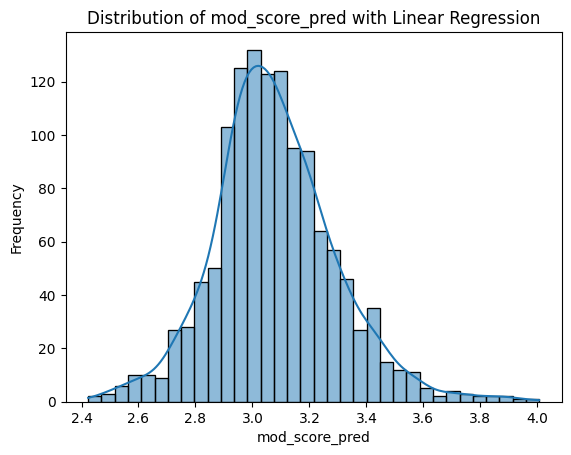

In [50]:
# Plot distribution of mod_score_pred 
sns.histplot(df_lr['mod_score_pred'], kde = True)

plt.title('Distribution of mod_score_pred with Linear Regression')
plt.xlabel('mod_score_pred')
plt.ylabel('Frequency')
plt.show()

In [51]:
# use gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor
# Initialize a dictionary to store the feature importances for each independent variable
importances = {var: [] for var in df_gb.columns}
# Initialize a list to store the intercepts for each dependent variable
intercepts = []

for column in df_gb.columns:
    X = df_gb.drop(column, axis=1)
    y = df_gb[column]
    reg = GradientBoostingRegressor().fit(X, y)
    print(f"Dependent variable: {column}")
    print("Feature importances:")
    for var, imp in zip(X.columns, reg.feature_importances_):
        print(f"{var}: {imp}")
        importances[var].append(imp)
    intercepts.append(reg.init_.constant_[0][0])
    print('\n')

# Calculate the average feature importance for each independent variable
avg_importances = {var: sum(importances[var])/len(importances[var]) for var in importances}
# Calculate the average intercept
avg_intercept = sum(intercepts)/len(intercepts)

print("Average feature importances:")
for var, avg_imp in avg_importances.items():
    print(f"{var}: {avg_imp}")
print(f"Average intercept: {avg_intercept}")

# GradientBoostingRegressor Average feature importances:
# Productivity: 0.2093361585423709
# Utilisation %: 0.4607097441421819
# handling time: 0.4470964681876728
# accuracy: 0.21619096246110772
# Average intercept: 3.1534027991004168

Dependent variable: Productivity
Feature importances:
Utilisation %: 0.4929928057447064
handling time: 0.40304874808099966
accuracy: 0.10395844617429403


Dependent variable: Utilisation %
Feature importances:
Productivity: 0.21396177557135856
handling time: 0.6211301723116196
accuracy: 0.16490805211702192


Dependent variable: handling time
Feature importances:
Productivity: 0.12428974276283014
Utilisation %: 0.4960038681451625
accuracy: 0.37970638909200727


Dependent variable: accuracy
Feature importances:
Productivity: 0.28975695729292406
Utilisation %: 0.39313255853667683
handling time: 0.3171104841703991


Average feature importances:
Productivity: 0.2093361585423709
Utilisation %: 0.4607097441421819
handling time: 0.4470964681876728
accuracy: 0.21619096246110772
Average intercept: 3.1534027991004168


In [52]:
# Gradient boosting average feature importances and intercept

avg_importances = {
    'Productivity': 0.2093361585423709,
    'Utilisation %': 0.4607097441421819,
    'handling time': 0.4470964681876728,
    'accuracy': 0.21619096246110772,
}
avg_intercept = 3.1534027991004168
# Define the independent variables
X = df_gb[list(avg_importances.keys())]
# Calculate the weighted average of the independent variables
mod_score_pred = X.dot(np.array(list(avg_importances.values()))) + avg_intercept

df_gb['moderator'] = mod_gb
df_gb['mod_score_pred'] = mod_score_pred
df_gb.to_excel('mod_df_gb.xlsx',index=None)


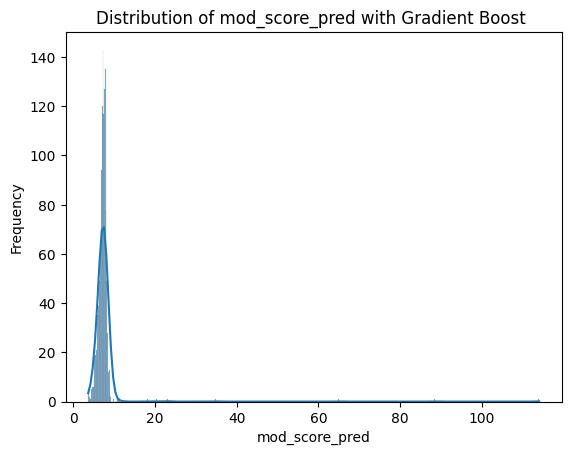

In [53]:
# Plot distribution of mod_score_pred 
sns.histplot(df_gb['mod_score_pred'], kde = True)

plt.title('Distribution of mod_score_pred with Gradient Boost ')
plt.xlabel('mod_score_pred')
plt.ylabel('Frequency')
plt.show()
